In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt
import math
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.datasets import load_files

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from wordcloud import WordCloud
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import neighbors
from IPython.display import Image



import pydotplus
from sklearn import ensemble

import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')
import time
import cv2
import glob

## Feature Engineering 2

Here we split the data into testing and training sets and apply PCA to prepare the data for the models.

In [3]:
#make dummies from the 'encoded_brand' variable to use in the feature set
brand_dummies = pd.get_dummies(df_smaller_downsampled[['encoded_brand']], drop_first=True)

In [32]:
X = pd.concat([df_smaller_downsampled[['device_id', 'app_id', 'is_active', 'label_id', 'event_id', 
                            'haversine_distance', 'time_hour']], brand_dummies], axis=1)

y = df_smaller_downsampled['gender']

In [33]:
X_norm = normalize(X)

In [34]:
Xt = X_norm.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

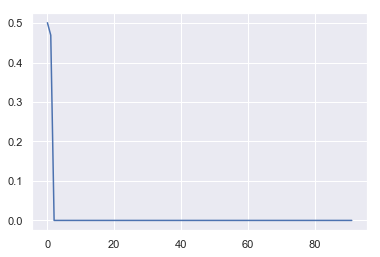

[5.00710990e-01 4.69145926e-01 4.45622943e-25 6.76724868e-30
 2.25997911e-32 9.45168645e-36 3.14142949e-38 5.14214788e-38
 2.70281190e-38 1.65501930e-38]


In [38]:
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov[0:10])

In [36]:
start_time = time.time()

sklearn_pca = PCA(n_components=2)  
X_pca = sklearn_pca.fit_transform(X_norm)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    sklearn_pca.explained_variance_ratio_
)

print("--- %s seconds ---" % (time.time() - start_time))

The percentage of total variance in the dataset explained by each component from Sklearn PCA:
 [0.51627305 0.48372695]
--- 4.041216135025024 seconds ---


In [39]:
X_pca.shape

(802954, 2)

In [40]:
# Split the data into four equally-sized samples for analysis with silhouette. 

X_pcahalf1, X_pcahalf2 = train_test_split(
    X_pca,
    test_size=0.5,
    random_state=42)
X_pca1, X_pca2 = train_test_split(
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X_pca3, X_pca4 = train_test_split(
    X_pcahalf2,
    test_size=0.5,
   random_state=42)

In [67]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.1,
    random_state=1)

## Model: RFC

In [69]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 42.189146995544434 seconds ---


In [70]:
start_time = time.time()

#making predictions for model evaluation
y_preds_rfc=rfc.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.45691967010498047 seconds ---


In [ ]:
#evaluating the model performance through xvalidation of the training set

start_time = time.time()

print(cross_val_score(rfc, X_train, y_train, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

In [92]:
#evaluating the model performance through xvalidation of the testing set
start_time = time.time()

print(cross_val_score(rfc, X_test, y_test, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

[0.64694894 0.65853051 0.65516812 0.65803238 0.65118306 0.65516812
 0.66002491 0.65973347 0.66620999 0.65744893]
--- 20.383530139923096 seconds ---


In [72]:
#classification report

print(classification_report(y_test, y_preds_rfc, labels=None, target_names=None, 
                      sample_weight=None, digits=2, output_dict=False
                     ))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     40237
           1       0.88      0.89      0.88     40059

    accuracy                           0.88     80296
   macro avg       0.88      0.88      0.88     80296
weighted avg       0.88      0.88      0.88     80296



In [73]:
#confusion matrix
print('Test set confusion matrix:', '\n', 
      confusion_matrix(y_test, y_preds_rfc, labels=None, sample_weight=None)
     )

Test set confusion matrix: 
 [[35258  4979]
 [ 4494 35565]]
